In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#from scipy.stats import linregress
import json
from pprint import pprint
all_agencies = "agencies/all_agencies.csv"
agency_df = pd.read_csv(all_agencies)
from config import fbi_key
fbi_url = "https://api.usa.gov/crime/fbi/sapi/"


agencies = agency_df["ori"]
agg_assault = []
burglary = []
larceny = []
mvt = []
homicide = []
rape = []
robbery = []
arson = []
viol_crime = []
prop_crime = []
crime = []

#for agency in agencies:

#`https://api.usa.gov/crime/fbi/sapi/{desired_endpiont}?api_key'
    #url = f"https://api.usa.gov/crime/fbi/sapi/api/summarized/agencies/{agency}/offenses/2019/2019?API_KEY={fbi_key}"
    #response = requests.get(url)
    #response_json = response.json()
    
    #crime.extend(response_json["results"])

    #if we want to do specific offenses, put offenses in as {offenses}
    #print(response_json['results'])

In [2]:
#crime=(response_json["results"])
#crime["actual"]["offense"]

In [3]:
#crime_2019_df=pd.DataFrame(crime)
#crime_2019_df

In [4]:
#county agencies
#Brazos (college station) ori - TX0210000
#College Station (city) ori - TX0210200
#Waco (city) ori - TX1551200
#McLennan (Waco) ori - TX1550000
#Dallas (Dallas) ori - TX0570000
#Dallas (city) ori - TXDPD0000
#San Antonio (Bexar) ori - TX0150000
#San Antonio (city) ori - TXSPD0000

In [5]:
#for agency in agencies:

#`https://api.usa.gov/crime/fbi/sapi/{desired_endpiont}?api_key'
    #url = f"https://api.usa.gov/crime/fbi/sapi/api/summarized/agencies/{agency}/offenses/2018/2018?API_KEY={fbi_key}"
    #response = requests.get(url)
    #response_json = response.json()
    
    #crime.extend(response_json["results"])

#crime_2018_df=pd.DataFrame(crime)
#crime_2018_df


In [6]:
for agency in agencies:

#`https://api.usa.gov/crime/fbi/sapi/{desired_endpiont}?api_key'
    url = f"https://api.usa.gov/crime/fbi/sapi/api/summarized/agencies/{agency}/offenses/2018/2019?API_KEY={fbi_key}"
    response = requests.get(url)
    response_json = response.json()
    
    crime.extend(response_json["results"])

crime_all_df=pd.DataFrame(crime)
crime_all_df


,ori,data_year,offense,state_abbr,cleared,actual
0,TX0153500,2018,robbery,TX,0,0
1,TX0153500,2018,aggravated-assault,TX,31,31
2,TX0153500,2018,arson,TX,0,0
3,TX0153500,2018,burglary,TX,2,2
4,TX0153500,2018,homicide,TX,0,0
...,...,...,...,...,...,...
1351,TX1551200,2019,homicide,TX,5,10
1352,TX1551200,2019,human-trafficing,TX,0,0
1353,TX1551200,2019,larceny,TX,919,3492
1354,TX1551200,2019,motor-vehicle-theft,TX,56,323


In [48]:
merge_df = pd.merge(agency_df, crime_all_df, on = "ori")
merge_df

,Unnamed: 0,ori,county,name,region,lat,lon,"lat,lon",data_year,offense,state_abbr,cleared,actual
0,0,TX0153500,BEXAR,Independent School District: East Central,South,29.448671,-98.520147,"29.448671,-98.520147",2018,robbery,TX,0,0
1,0,TX0153500,BEXAR,Independent School District: East Central,South,29.448671,-98.520147,"29.448671,-98.520147",2018,aggravated-assault,TX,31,31
2,0,TX0153500,BEXAR,Independent School District: East Central,South,29.448671,-98.520147,"29.448671,-98.520147",2018,arson,TX,0,0
3,0,TX0153500,BEXAR,Independent School District: East Central,South,29.448671,-98.520147,"29.448671,-98.520147",2018,burglary,TX,2,2
4,0,TX0153500,BEXAR,Independent School District: East Central,South,29.448671,-98.520147,"29.448671,-98.520147",2018,homicide,TX,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,58,TX1551200,MCLENNAN,Waco Police Department,South,31.549493,-97.201472,"31.549493,-97.201472",2019,homicide,TX,5,10
1352,58,TX1551200,MCLENNAN,Waco Police Department,South,31.549493,-97.201472,"31.549493,-97.201472",2019,human-trafficing,TX,0,0
1353,58,TX1551200,MCLENNAN,Waco Police Department,South,31.549493,-97.201472,"31.549493,-97.201472",2019,larceny,TX,919,3492
1354,58,TX1551200,MCLENNAN,Waco Police Department,South,31.549493,-97.201472,"31.549493,-97.201472",2019,motor-vehicle-theft,TX,56,323


In [26]:
bexar_pop=20
dallas_pop=26
mc_pop=2.56
brazos=2.29
Total_pop=51.25

In [27]:
county_df=merge_df.groupby("county").sum()
county_df["actual"]
total_actual_df=pd.DataFrame(county_df["actual"])
total_actual_df

,actual
county,
BEXAR,41321
BRAZOS,22502
DALLAS,60928
MCLENNAN,31448


In [29]:
per_capita= total_actual_df/Total_pop
print(per_capita)

               actual
county               
BEXAR      806.263415
BRAZOS     439.063415
DALLAS    1188.839024
MCLENNAN   613.619512


In [61]:
by_countyoffense=merge_df.groupby(["county","offense"]).sum()["actual"]
by_countyoffense

county    offense            
BEXAR     aggravated-assault      1474
          arson                    115
          burglary                3003
          homicide                  30
          human-trafficing           0
          larceny                13806
          motor-vehicle-theft     1555
          property-crime         18364
          rape                     392
          rape-legacy               25
          robbery                  318
          violent-crime           2239
BRAZOS    aggravated-assault       767
          arson                     22
          burglary                1637
          homicide                   7
          human-trafficing           0
          larceny                 7611
          motor-vehicle-theft      698
          property-crime          9946
          rape                     306
          rape-legacy               27
          robbery                  187
          violent-crime           1294
DALLAS    aggravated-assault      

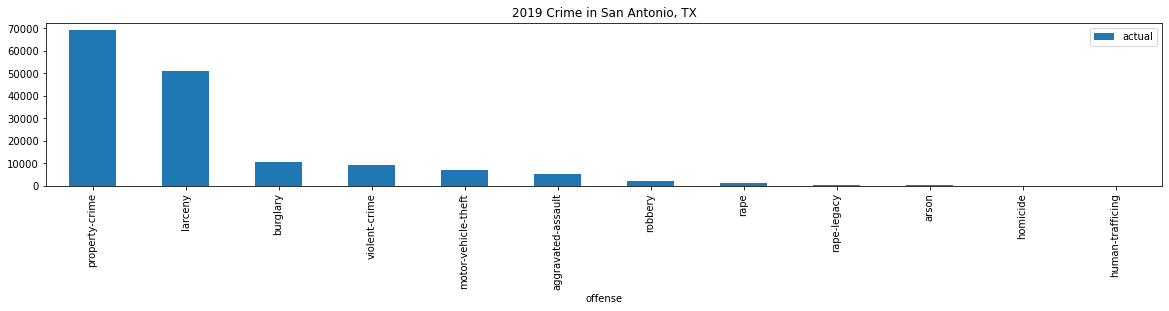

<Figure size 432x288 with 0 Axes>

In [16]:
by_crime_df=by_crime_df.sort_values("actual",ascending=False)
offense_actual=by_crime_df[["actual"]]


# Set a title for the chart
offense_actual.plot(kind="bar", figsize=(20,3))
plt.title("2019 Crime in San Antonio, TX")

plt.show()
plt.tight_layout()